# **Matplotlib & Seaborn** 📊

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

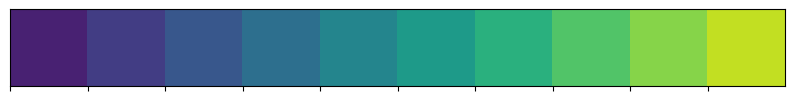

In [ ]:
sns.palplot(sns.color_palette("viridis", 10))

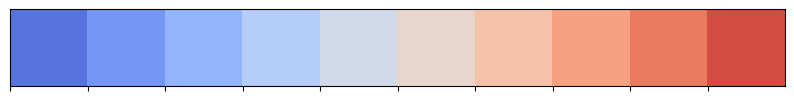

In [ ]:
sns.palplot(sns.color_palette("coolwarm", 10))

## **Time Series Visuals**

Always use a **line chart** or **column chart** to show values over time. The X-axis should present time, sorted from earliest to latest periods (left to right). Line charts work well with a consistent flow of data, such as when sales are recorded for every period. If no sales are recorded for some periods, the line chart visual will fill such gaps with a straight line that connects the values of the previous and next periods. If missing values are a possibility, a column chart might be a better visual choice because it will help to avoid the interpretation of a non-existent trend. 
- Stacked column chart
- Area chart
- Line and stacked column chart
- Ribbon chart, which has the added benefit of showing rank changes over time


### **Line Charts**

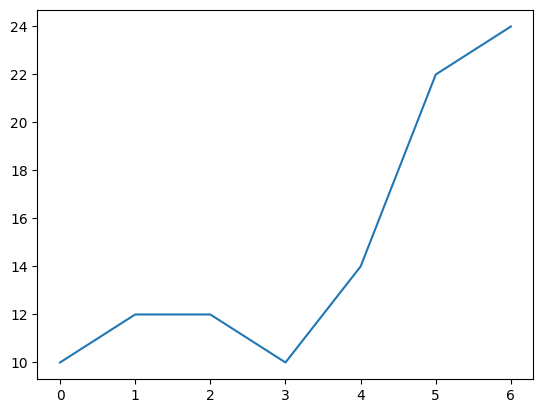

In [3]:
days = range(7)
money_spent = [10, 12, 12, 10, 14, 22, 24]

plt.plot(days, money_spent)
plt.show()

<Axes: >

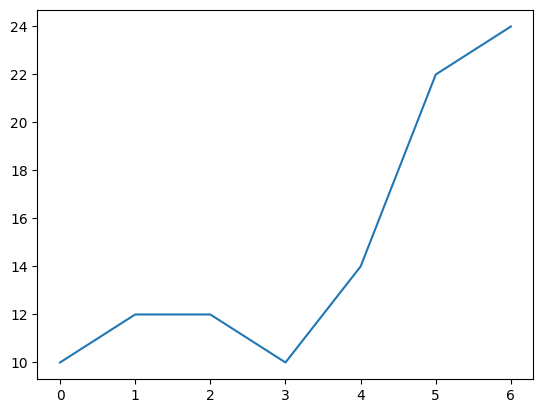

In [4]:
sns.lineplot(x=days, y=money_spent)

#### **Multiple Series**

We can also have multiple line plots displayed on the same set of axes. This can be very useful if we want to compare two datasets with the same scale and axis categories.

Matplotlib will automatically place the two lines on the same axes and give them different colors if you call `plt.plot()` twice.

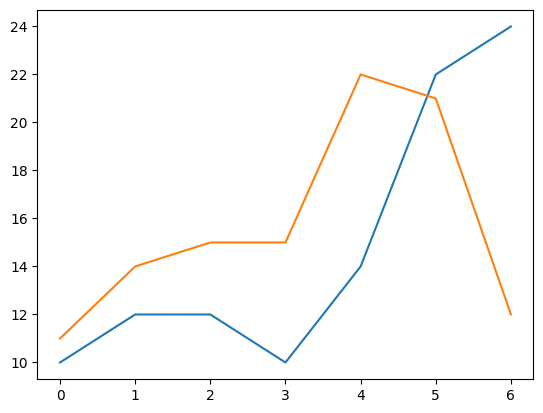

In [5]:
# Days of the week:
days = [0, 1, 2, 3, 4, 5, 6]
# Your Money:
money_spent = [10, 12, 12, 10, 14, 22, 24]
# Your Friend's Money:
money_spent_2 = [11, 14, 15, 15, 22, 21, 12]
# Plot your money:
plt.plot(days, money_spent)
# Plot your friend's money:
plt.plot(days, money_spent_2)
# Display the result:
plt.show()

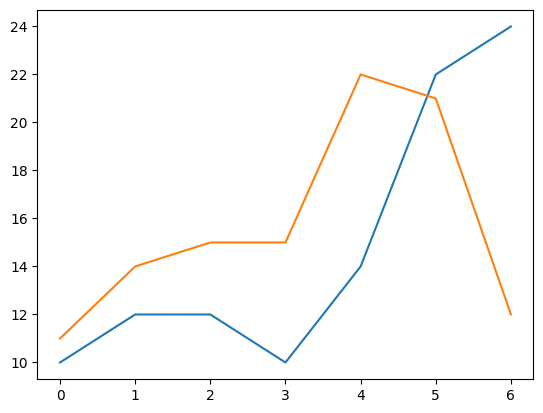

In [6]:
sns.lineplot(x=days, y=money_spent)
sns.lineplot(x=days, y=money_spent_2)
plt.show()

#### **Formatting**

We can specify a different color for a line by using the keyword `color` with either an HTML color name or a HEX code:

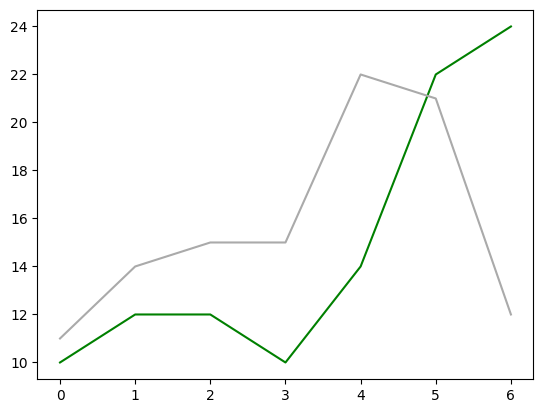

In [7]:
plt.plot(days, money_spent, color="green")
plt.plot(days, money_spent_2, color="#AAAAAA")
plt.show()

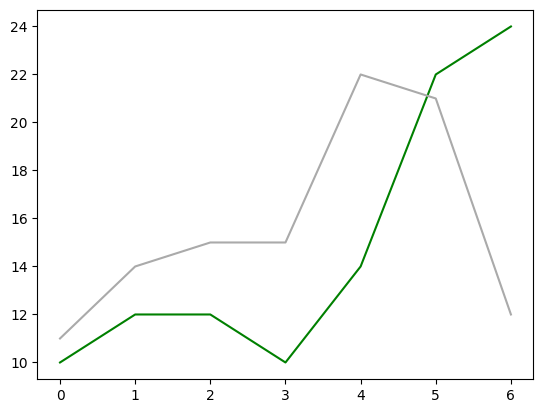

In [8]:
sns.lineplot(x=days, y=money_spent, color="green")
sns.lineplot(x=days, y=money_spent_2, color="#AAAAAA")
plt.show()

We can also make a line dotted or dashed using the keyword `linestyle`.

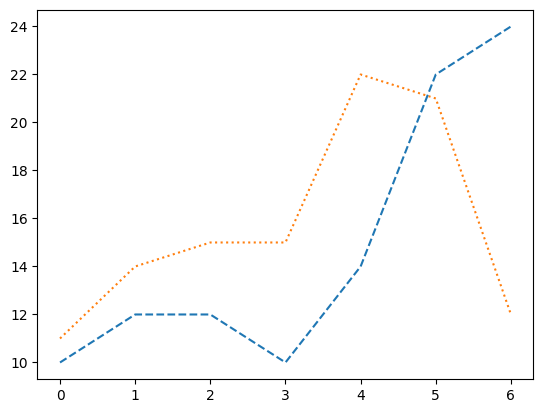

In [9]:
# Dashed:
plt.plot(days, money_spent, linestyle="--")
# Dotted:
plt.plot(days, money_spent_2, linestyle=":")
plt.show()

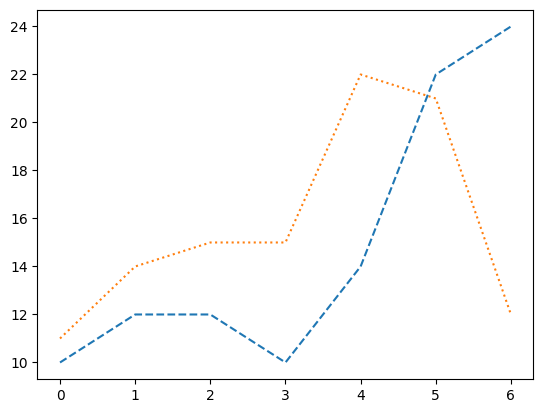

In [10]:
sns.lineplot(x=days, y=money_spent, linestyle="--")
sns.lineplot(x=days, y=money_spent_2, linestyle=":")
plt.show()

We can also add a marker using the keyword `marker`:

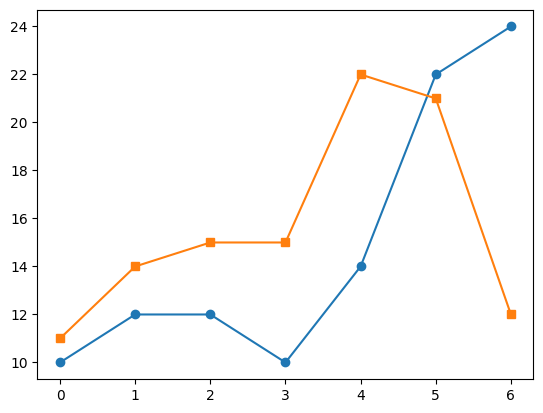

In [11]:
# A circle:
plt.plot(days, money_spent, marker="o")
# A square:
plt.plot(days, money_spent_2, marker="s")
plt.show()

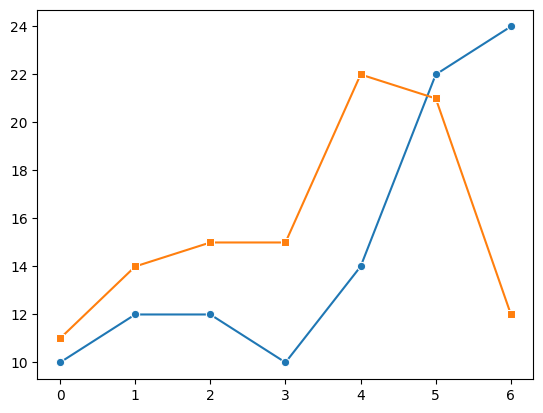

In [12]:
sns.lineplot(x=days, y=money_spent, marker="o")
sns.lineplot(x=days, y=money_spent_2, marker="s")
plt.show()

#### **Error Bounds**

In Matplotlib, we can use `plt.fill_between()` to shade error. This function takes three arguments:

1. `x-values` — this works just like the x-values of `plt.plot()`
2. lower-bound for y-values — sets  the bottom of the shaded area
3. upper-bound for y-values — sets the top of the shaded area

Generally, we use `.fill_between()` to create a shaded error region, and then plot the actual line over it. We can set the `alpha` keyword to a value between 0 and 1 in the `fill_between()` call for transparency so that we can see the line underneath.

Having to calculate `y_lower` and `y_upper` by hand is time-consuming. If we try to just subtract 2 from `y_values`, we will get an error. In order to correctly add or subtract from a list, we need to use list comprehension.

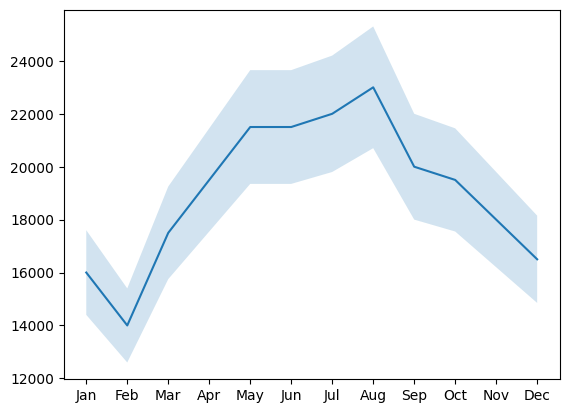

In [13]:
months = range(12)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
revenue = [16000, 14000, 17500, 19500, 21500, 21500, 22000, 23000, 20000, 19500, 18000, 16500]

plt.plot(months, revenue)

ax = plt.subplot()
ax.set_xticks(months)
ax.set_xticklabels(month_names)

y_upper = [i + (i * 0.10) for i in revenue]
y_lower = [i - (i * 0.10) for i in revenue]

plt.fill_between(months, y_lower, y_upper, alpha=0.2)

plt.show()

Seaborn creates errorbars based on the `errrobar` parameter. For lineplot it is `errorbar=('ci', 95)` by default. If you don't want it to be visible, you can set the parameter to `None`. 

The fluctuating error bars are created using a statistical method of bootstrapping with replacements. Essentially from what I understand, for each line, you take many samples with replacements and replot the line to get a distribution of lines. Then you take the 95% band using that distribution to get the error bands.

## **Customisations**

### **Axes**

Sometimes, it can be helpful to zoom in or out of the plot, especially if there is some detail we want to address. To zoom, we can use `plt.axis()`. We use `plt.axis()` by feeding it a list as input. This list should contain:
- The minimum x-value displayed
- The maximum x-value displayed
- The minimum y-value displayed
- The maximum y-value displayed

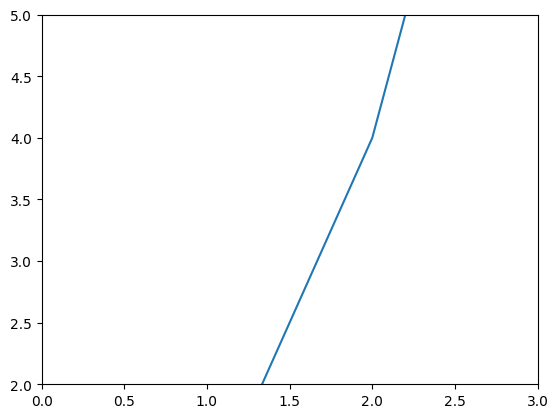

In [14]:
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]
plt.plot(x, y)
plt.axis([0, 3, 2, 5])
plt.show()

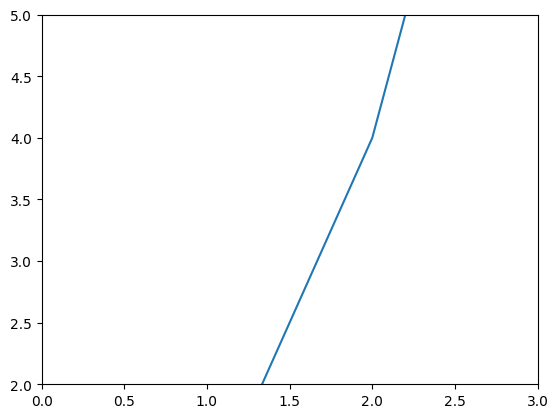

In [15]:
sns.lineplot(x=x, y=y)
plt.axis([0, 3, 2, 5])
plt.show()

### **Titles & Labels**

We can label the x- and y- axes by using `plt.xlabel()` and `plt.ylabel()`. The plot title can be set by using `plt.title()`.

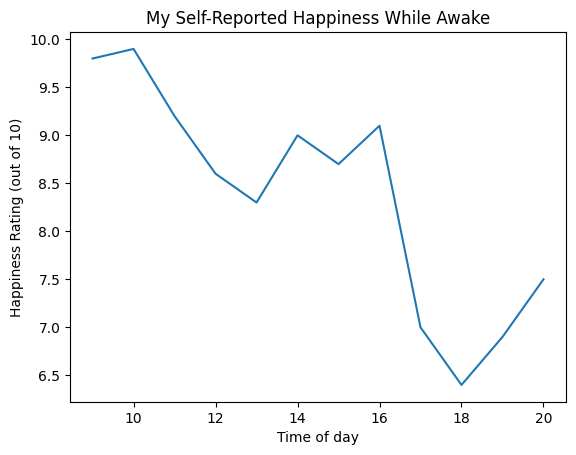

In [16]:
hours = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
happiness = [9.8, 9.9, 9.2, 8.6, 8.3, 9.0, 8.7, 9.1, 7.0, 6.4, 6.9, 7.5]

plt.plot(hours, happiness)
plt.xlabel("Time of day")
plt.ylabel("Happiness Rating (out of 10)")
plt.title("My Self-Reported Happiness While Awake")
plt.show()

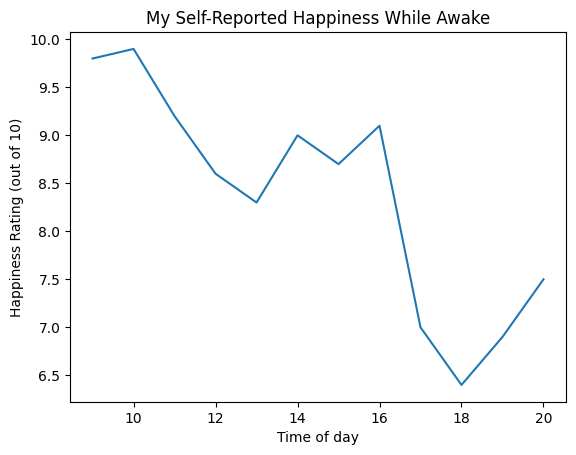

In [17]:
sns.lineplot(x=hours, y=happiness)
plt.xlabel("Time of day")
plt.ylabel("Happiness Rating (out of 10)")
plt.title("My Self-Reported Happiness While Awake")
plt.show()

### **Legend**

When we have multiple lines on a single graph we can label them by using the command `plt.legend()`. The `legend` method takes a list with the labels to display. 

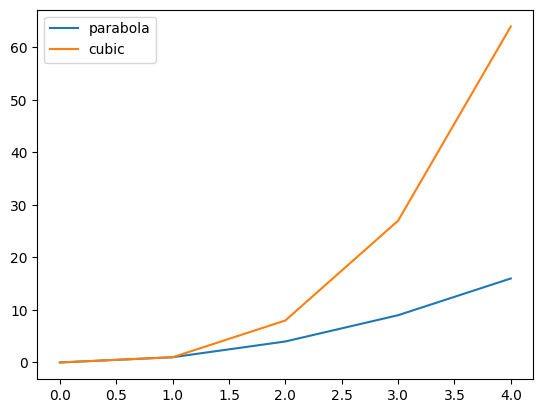

In [18]:
plt.plot([0, 1, 2, 3, 4], [0, 1, 4, 9, 16])
plt.plot([0, 1, 2, 3, 4], [0, 1, 8, 27, 64])
plt.legend(["parabola", "cubic"])
plt.show()

`plt.legend()` can also take a keyword argument `loc`, which will position the legend on the figure. If you decide not to set a value for `loc`, it will default to choosing the “best” location.

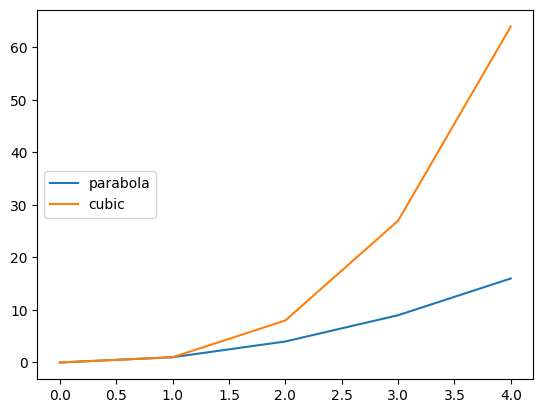

In [19]:
plt.plot([0, 1, 2, 3, 4], [0, 1, 4, 9, 16])
plt.plot([0, 1, 2, 3, 4], [0, 1, 8, 27, 64])
plt.legend(["parabola", "cubic"], loc=6)
plt.show()

Sometimes, it’s easier to label each line as we create it. If we want, we can use the keyword `label` inside of `plt.plot()`. If we choose to do this, we don’t pass any labels into `plt.legend()`. For example:

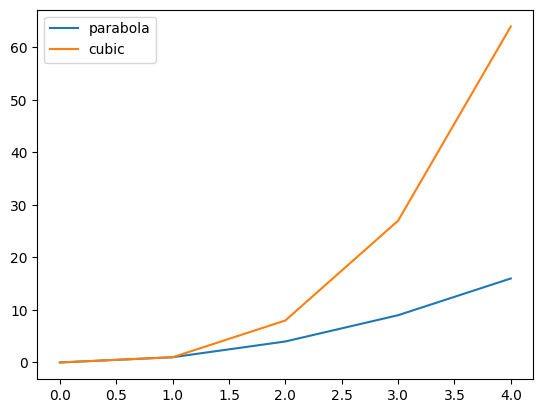

In [20]:
plt.plot([0, 1, 2, 3, 4], [0, 1, 4, 9, 16], label="parabola")
plt.plot([0, 1, 2, 3, 4], [0, 1, 8, 27, 64], label="cubic")
plt.legend()  # Still need this command!
plt.show()

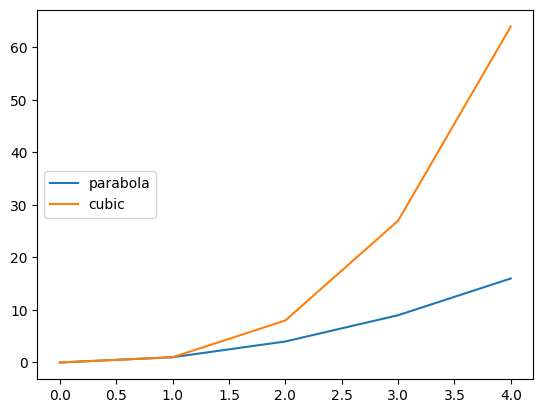

In [21]:
sns.lineplot(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16], label="parabola")
sns.lineplot(x=[0, 1, 2, 3, 4], y=[0, 1, 8, 27, 64], label="cubic")
plt.legend(loc=6)
plt.show()

### **Subplots**

Sometimes, we want to display two visuals side-by-side, rather than in the same set of x- and y-axes. When we have multiple axes in the same picture, we call each set of axes a subplot. The picture or object that contains all of the subplots is called a figure.

We can have many different subplots in the same figure, and we can lay them out in many different ways. We can think of our layouts as having rows and columns of subplots. We can create subplots using `.subplot()`. The command `plt.subplot()` needs three arguments to be passed into it:
- The number of rows of subplots
- The number of columns of subplots
- The index of the subplot we want to create

Any `plt.plot()` that comes after `plt.subplot()` will create a line plot in the specified subplot. 

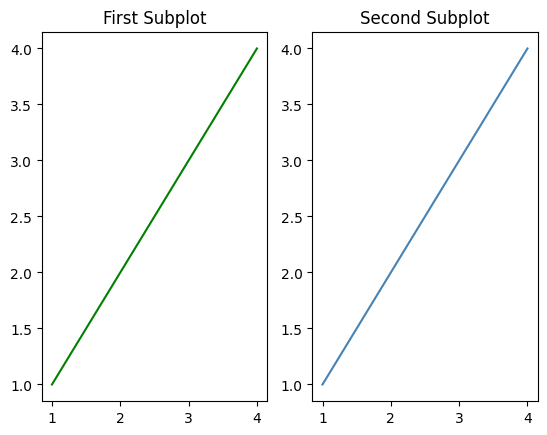

In [22]:
# Data sets
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

# First Subplot
plt.subplot(1, 2, 1)
plt.plot(x, y, color="green")
plt.title("First Subplot")

# Second Subplot
plt.subplot(1, 2, 2)
plt.plot(x, y, color="steelblue")
plt.title("Second Subplot")

# Display both subplots
plt.show()

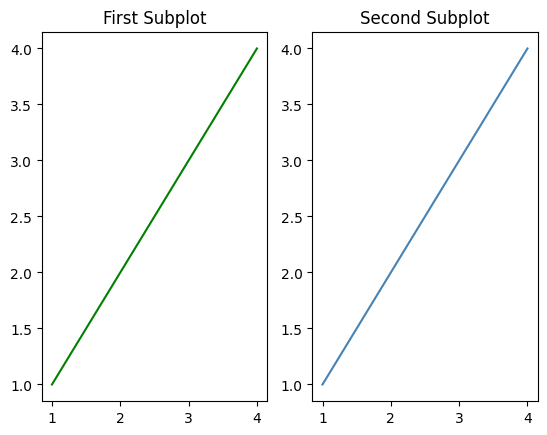

In [23]:
plt.subplot(1, 2, 1)
sns.lineplot(x=x, y=y, color="green")
plt.title("First Subplot")

plt.subplot(1, 2, 2)
sns.lineplot(x=x, y=y, color="steelblue")
plt.title("Second Subplot")

plt.show()

Sometimes, when we’re putting multiple subplots together, some elements can overlap and make the figure unreadable. We can customize the spacing between our subplots to make sure that the figure we create is visible and easy to understand. To do this, we use the `plt.subplots_adjust()` command. `.subplots_adjust()` has some keyword arguments that can move your plots within the figure:

- `left` — the left-side margin, with a default of 0.125. You can increase this number to make room for a y-axis label
- `right` — the right-side margin, with a default of 0.9. You can increase this to make more room for the figure, or decrease it to make room for a legend
- `bottom` — the bottom margin, with a default of 0.1. You can increase this to make room for tick mark labels or an x-axis label
- `top` — the top margin, with a default of 0.9
- `wspace` — the horizontal space between adjacent subplots, with a default of 0.2
- `hspace` — the vertical space between adjacent subplots, with a default of 0.2

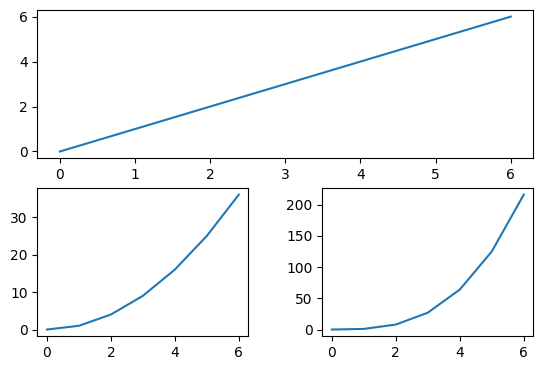

In [24]:
x = range(7)
straight_line = [0, 1, 2, 3, 4, 5, 6]
parabola = [0, 1, 4, 9, 16, 25, 36]
cubic = [0, 1, 8, 27, 64, 125, 216]

# Subplot 1
plt.subplot(2, 1, 1)
plt.plot(x, straight_line)

# Subplot 2
plt.subplot(2, 2, 3)
plt.plot(x, parabola)

# Subplot 3
plt.subplot(2, 2, 4)
plt.plot(x, cubic)

plt.subplots_adjust(wspace=0.35, bottom=0.2)

plt.show()

### **Ticks**

Because our plots can have multiple subplots, we have to specify which one we want to modify. In order to do that, we call `plt.subplot()` in a different way.

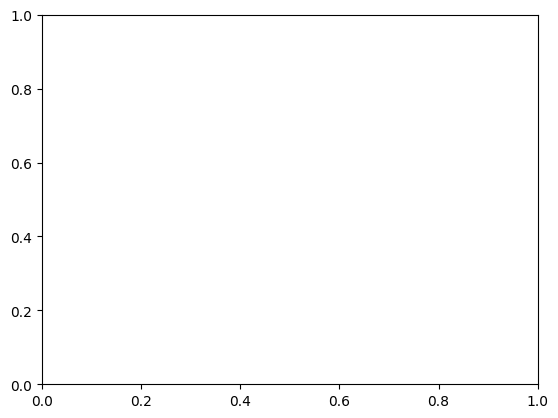

In [25]:
ax = plt.subplot(1, 1, 1)

`ax` is an axes object, and it lets us modify the axes belonging to a specific subplot. Even if we only have one subplot, when we want to modify the ticks, we will need to start by calling either `ax = plt.subplot(1, 1, 1)` or `ax = plt.subplot()` in order to get our axes object.

Suppose we wanted to set our x-ticks to be at 1, 2, and 4. We would use the following code:

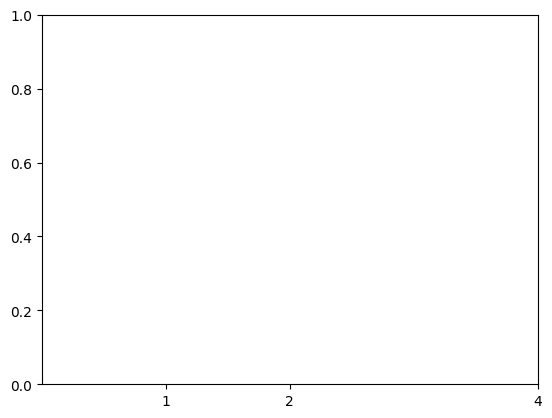

In [26]:
ax = plt.subplot()
# plt.plot([0, 1, 2, 3, 4], [0, 1, 4, 9, 16])
# plt.plot([0, 1, 2, 3, 4], [0, 1, 8, 27, 64])
ax.set_xticks([1, 2, 4])
plt.show()

We can also modify the y-ticks by using `ax.set_yticks()`.

When we change the x-ticks, their labels automatically change to match. But, if we want special labels (such as strings), we can use the command `ax.set_xticklabels()` or `ax.set_yticklabels()`. For example, we might want to have a y-axis with ticks at 0.1, 0.6, and 0.8, but label them 10%, 60%, and 80%, respectively. To do this, we use the following commands:

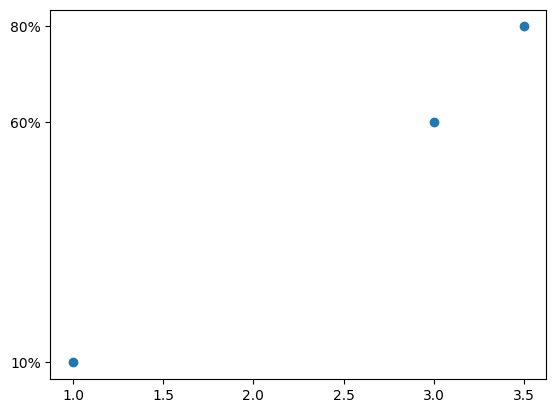

In [27]:
ax = plt.subplot()
plt.plot([1, 3, 3.5], [0.1, 0.6, 0.8], "o")
ax.set_yticks([0.1, 0.6, 0.8])
ax.set_yticklabels(["10%", "60%", "80%"])
plt.show()

### **Figures**

In order to be sure that you don’t have any stray lines, you can use the command `plt.close('all')` to clear all existing plots before you plot a new one.

In [28]:
plt.close("all")

Previously, we learned how to put two sets of axes into the same figure. Sometimes, we would rather have two separate figures. We can use the command `plt.figure()` to create new figures and size them how we want. We can add the keyword `figsize=(width, height)` to set the size of the figure, in inches.

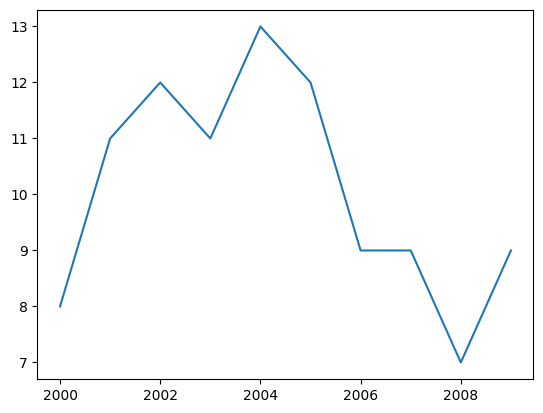

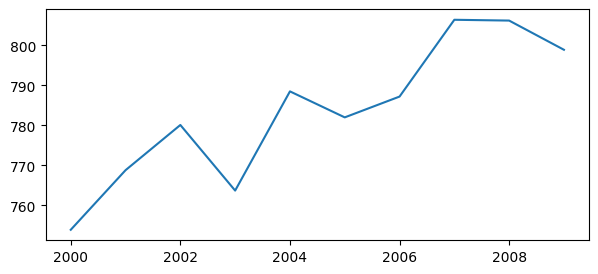

In [30]:
word_length = [8, 11, 12, 11, 13, 12, 9, 9, 7, 9]
power_generated = [753.9, 768.8, 780.1, 763.7, 788.5, 782, 787.2, 806.4, 806.2, 798.9]
years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

plt.figure()
plt.plot(years, word_length)

plt.figure(figsize=(7, 3))
plt.plot(years, power_generated)
plt.show()

### **Exporting Visuals** 

Once we’ve created a figure, we might want to save it so that we can use it in a presentation or a website. We can use the command `plt.savefig()` to save out to many different file formats, such as png, svg, or pdf. After plotting, we can call `plt.savefig('name_of_graph.png')`.

In [32]:
import os

from src.config import CREDIT_RISK_DATA_DIR

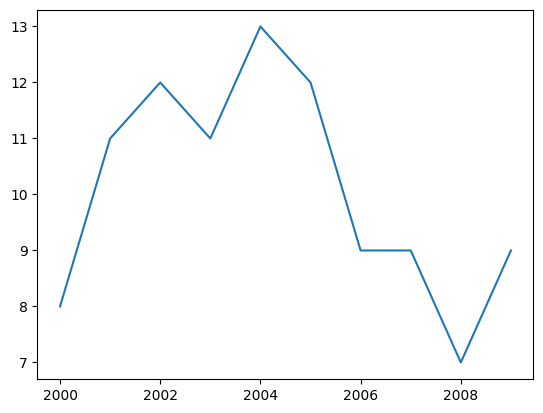

In [33]:
plt.figure()
plt.plot(years, word_length)

os.chdir(CREDIT_RISK_DATA_DIR)
plt.savefig("winning_word_lengths.png")

## **Categorical Visuals**

Often, **bar charts** or **column charts** are good choices when you need to show data across multiple categories. Selecting which type depends on the number of categories and the kind of information that you want to visualize. For example, if many category values are available, you should avoid selecting a visual where colour is used to split the data, such as a stacked bar chart with a category legend. Instead, use the category dimension on the axis of a bar chart.

Additionally, you should avoid a line chart with a categorical X-axis because the line implies a relationship between elements that might not exist. In the following example, notice that the line chart visual implies a relationship between the product categories on the X-axis.


### **Bar Charts**

The `plt.bar` function allows you to create simple bar charts to compare multiple categories of data. We have to set the x-ticks before we set the x-labels because the default ticks won’t necessarily be one tick per bar, especially if we’re plotting a lot of bars. If we skip setting the x-ticks before the x-labels, we might end up with labels in the wrong place. 

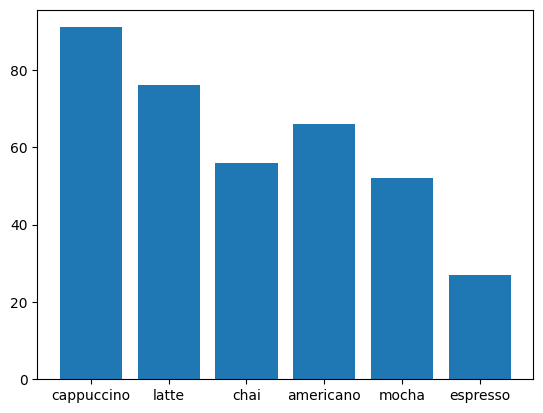

In [34]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales = [91, 76, 56, 66, 52, 27]

ax = plt.subplot()
ax.set_xticks(range(len(drinks)))
ax.set_xticklabels(drinks)

plt.bar(drinks, sales)
plt.show()

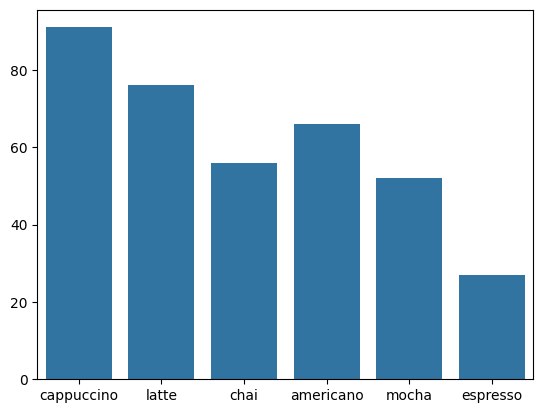

In [35]:
sns.barplot(x=drinks, y=sales)
plt.show()

If your labels are particularly long, you can use the `rotation` keyword to rotate your labels by a specified number of degrees:

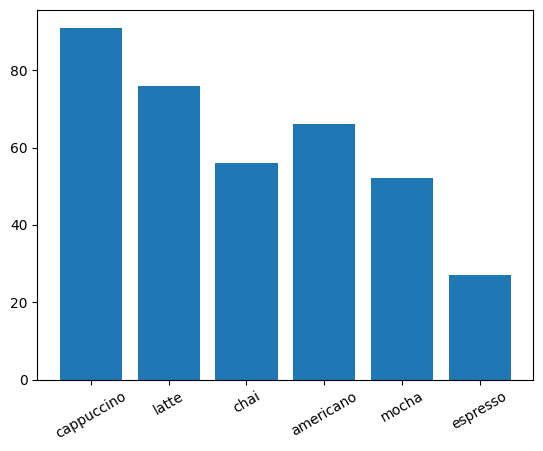

In [36]:
ax = plt.subplot()
ax.set_xticks(range(len(drinks)))
ax.set_xticklabels(drinks, rotation=30)

plt.bar(drinks, sales)
plt.show()

### **Side-by-side Bars**

We can use a bar chart to compare two sets  of data with the same types of axis values. To do this, we plot two sets of bars next to each other, so that the values of each category can be compared.

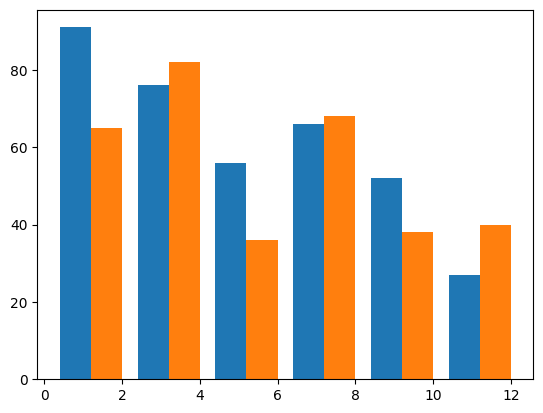

In [37]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 = [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

n = 1  # This is our first dataset (out of 2)
t = 2  # Number of dataset
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar
store1_x = [t * element + w * n for element in range(d)]
plt.bar(store1_x, sales1)

n = 2  # This is our second dataset (out of 2)
t = 2  # Number of dataset
d = 6  # Number of sets of bars
w = 0.8  # Width of each bar
store2_x = [t * element + w * n for element in range(d)]
plt.bar(store2_x, sales2)

plt.show()

In [39]:
import pandas as pd

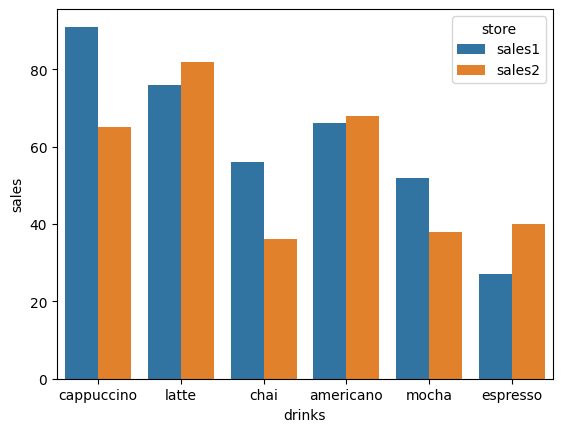

In [40]:
df = pd.DataFrame(data={"drinks": drinks, "sales1": sales1, "sales2": sales2})
df_unpivoted = df.melt(id_vars=["drinks"], var_name="store", value_name="sales")
sns.barplot(x="drinks", y="sales", hue="store", data=df_unpivoted)
plt.show()

### **Stacked Bars**

If we want to compare two sets of data while preserving knowledge of the total between them, we can also stack the bars instead of putting them side by side. We do this by using the keyword `bottom`. The top set of bars will have `bottom` set to the heights of the other set of bars. 

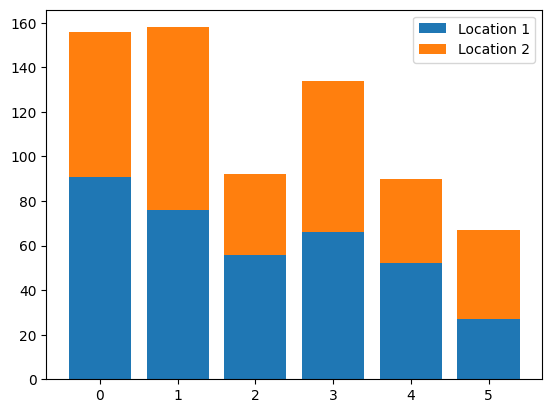

In [41]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
sales1 = [91, 76, 56, 66, 52, 27]
sales2 = [65, 82, 36, 68, 38, 40]

plt.bar(range(len(drinks)), sales1)
plt.bar(range(len(drinks)), sales2, bottom=sales1)
plt.legend(["Location 1", "Location 2"])

plt.show()

Creating stacked plots is usually easier in pandas/matplotlib than in seaborn.

### **Error Bars**

Sometimes, we need to visually communicate some sort of uncertainty in the heights of those bars. To display error visually in a bar chart, we often use error bars to show where each bar could be, taking errors into account.

Each of the black lines is called an error bar. The taller the bar is, the more uncertain we are about the height of the blue bar. The horizontal lines at the top and bottom are called caps. They make it easier to read the error bars.

If we wanted to show an error of +/- 2, we would add the keyword `yerr=2` to our `plt.bar` command. To make the caps wide and easy to read, we would add the keyword `capsize=10`. If we want a different amount of error for each bar, we can make `yerr` equal to a list rather than a single number.

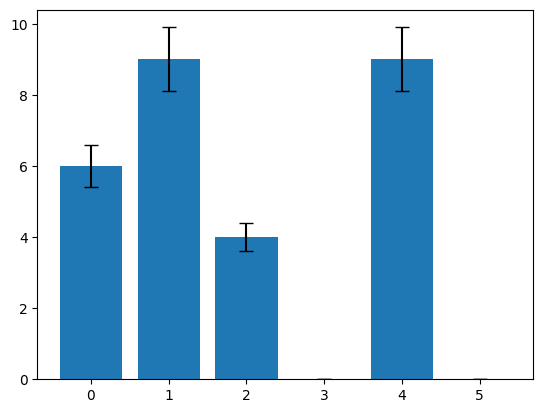

In [42]:
drinks = ["cappuccino", "latte", "chai", "americano", "mocha", "espresso"]
ounces_of_milk = [6, 9, 4, 0, 9, 0]
error = [0.6, 0.9, 0.4, 0, 0.9, 0]

# Plot the bar graph here
plt.bar(range(len(drinks)), ounces_of_milk, yerr=error, capsize=5)

plt.show()

### **Frequency Charts**

Bar charts are generally used to visualize the relative frequencies of categories within a variable. Therefore, they are primarily helpful for visually summarizing categorical variables  rather than quantitative variables.

Finally, we have one last thing to go over before we jump into coding our own charts. If you have ever run into histograms, you may notice that bar charts and histograms look almost identical. However, these are the key differences between them:

- Bar charts are used for categorical variables, while histograms are used for quantitative data.
- Histograms must always be arranged in a specific order because they represent a range of numerical values. For a bar chart, each bar represents frequencies of category variables within a category. Unless the variable is ordinal, the bars could be arranged in any order.

Plot the counts of your intended category with the `.countplot()` method in seaborn. 

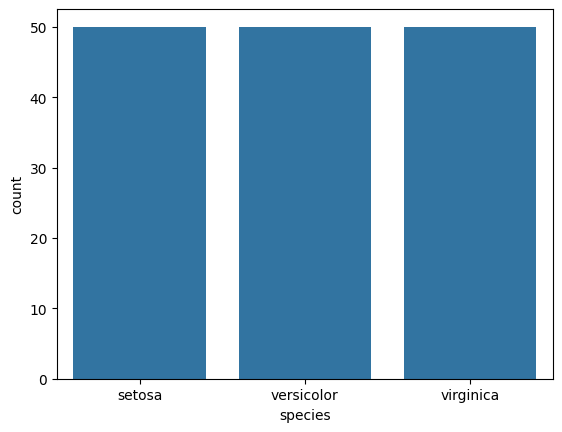

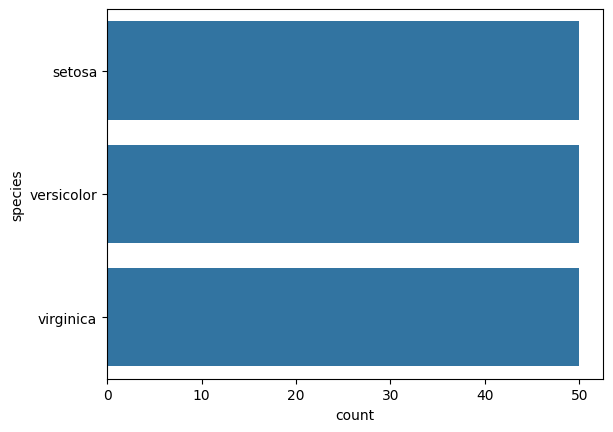

In [46]:
df = sns.load_dataset("iris")
sns.countplot(x=df["species"])
plt.show()

sns.countplot(y=df["species"])
plt.show()

We also want to note that the `countplot()` method is not the only method that builds bar charts in the seaborn library. `barplot()` can also be used to plot a bar chart in Python, and it is more flexible in that it can use any function to determine the height of the bars. For this lesson, we’ve chosen to use `countplot()` because the syntax is simpler

#### **Nominal Data**

Nominal data has labels with no specific order. Thus, we have a lot of creative freedom when choosing where each bar goes on our chart. One way would order our data is by ascending or descending order. Let’s apply this ordering by using the `.value_counts()` pandas method in the order parameter.

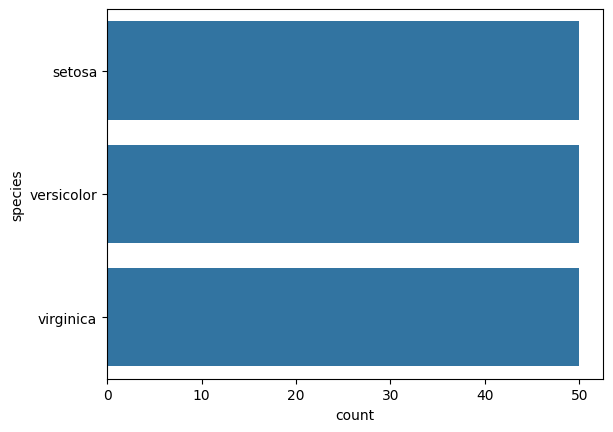

In [47]:
sns.countplot(df["species"], order=df["species"].value_counts(ascending=True).index)
plt.show()

#### **Ordinal Data**

If we are working with ordinal data, we should plot the data according to our categorical variables.

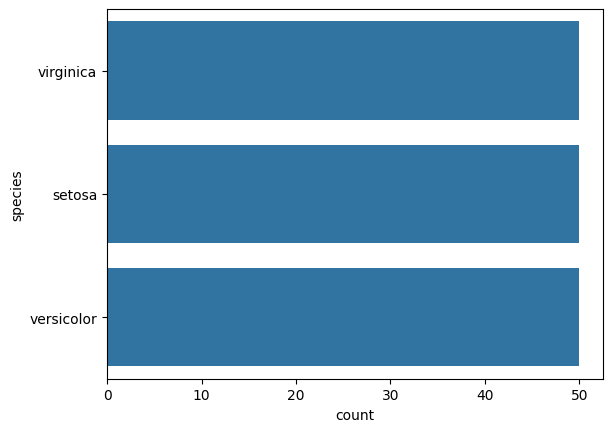

In [48]:
sns.countplot(df["species"], order=["virginica", "setosa", "versicolor"])
plt.show()

### **Pie Chart**

If we want to display elements of a data set as proportions of a whole, we can use a pie chart. In Matplotlib, you can make a pie chart with the command `plt.pie`, passing in the values you want to chart:

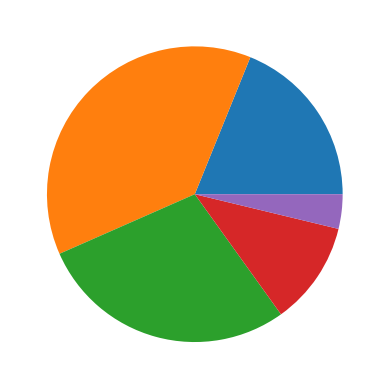

In [49]:
budget_data = [500, 1000, 750, 300, 100]

plt.pie(budget_data)
plt.show()

 Slices on a pie chart are tough to compare as the human eye has difficulty comparing areas. Looking at any of these pie charts, you will struggle to perceive the relative sizes of each slice.

#### **Legends & Labels**

We also want to be able to understand what each slice of the pie represents. To do this, we can either:

1. use a legend to label each color, or
2. put labels on the chart itself.

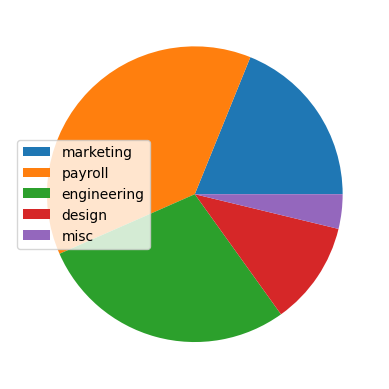

In [50]:
budget_data = [500, 1000, 750, 300, 100]
budget_categories = ["marketing", "payroll", "engineering", "design", "misc"]

plt.pie(budget_data)
plt.legend(budget_categories)

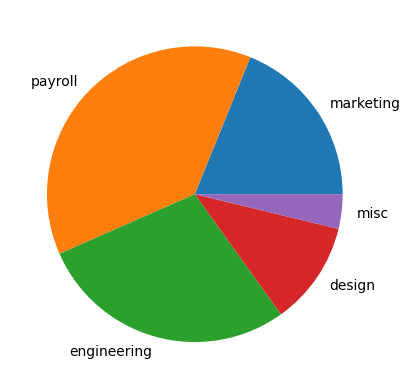

In [51]:
# option 2
plt.pie(budget_data, labels=budget_categories)
plt.show()

#### **Percentage Totals**

One other useful labeling tool for pie charts is adding the percentage of the total that each slice occupies. Matplotlib can add this automatically with the keyword `autopct`. We pass in string formatting instructions to format the labels how we want. Some common formats are:

- `'%0.2f'` — 2 decimal places, like 4.08
- `'%0.2f%%'` — 2 decimal places, but with a percent sign at the end, like 4.08%. You need two consecutive percent signs because the first one acts as an escape character, so that the second one gets displayed on the chart.
- `'%d%%'` — rounded to the nearest int and with a percent sign at the end, like 4%.

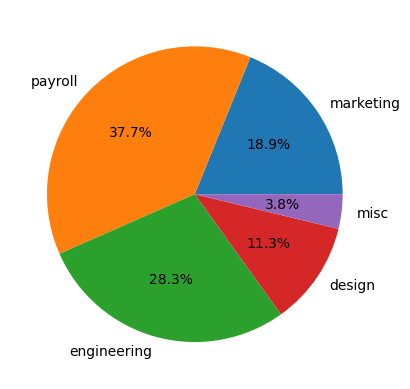

In [52]:
plt.pie(budget_data, labels=budget_categories, autopct="%0.1f%%")
plt.show()

## **Histograms**

Sometimes we want to get a feel for a large dataset with many samples beyond knowing just the basic metrics of mean, median, or standard deviation. To get more of an intuitive sense for a dataset, we can use a histogram to display all the values.

A histogram tells us how many values in a dataset fall between different sets of numbers (i.e., how many numbers fall between 0 and 10? Between 10 and 20? Between 20 and 30?). Each of these questions represents a bin, for instance, our first bin might be between 0 and 10.

All bins in a histogram are always the same size. The width of each bin is the distance between the minimum and maximum values of each bin. To make a histogram in Matplotlib, we use the command `plt.hist`. `plt.hist` finds the minimum and the maximum values in your dataset and creates 10 equally-spaced bins between those values.

If we want more than 10 bins, we can use the keyword `bins` to set how many bins we want to divide the data into. The keyword `range` selects the minimum and maximum values to plot. Histograms are best for showing the shape of a dataset.

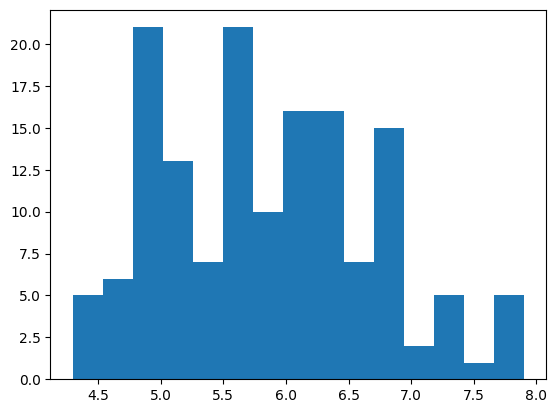

In [53]:
plt.hist(df.sepal_length, bins=15)
plt.show()

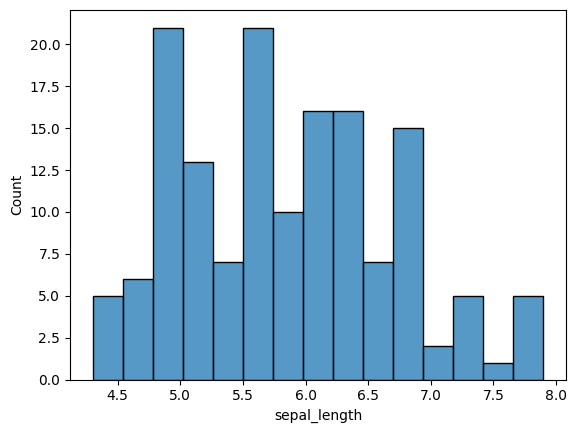

In [54]:
sns.histplot(data=df, x="sepal_length", bins=15)
plt.show()

### **Overlapping Histograms**

If we want to compare two different distributions, we can put multiple histograms on the same plot. This could be useful, for example, in comparing the heights of a bunch of men and the heights of a bunch of women. However, it can be hard to read two histograms on top of each other. 

Use the keyword `alpha`, which can be a value between 0 and 1. This sets the transparency of the histogram. A value of 0 would make the bars entirely transparent. A value of 1 would make the bars completely opaque.

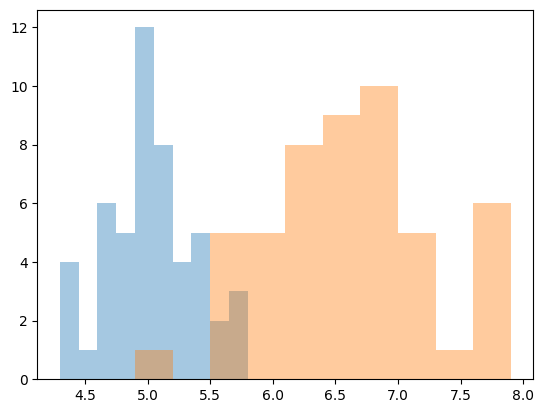

In [55]:
a = df[df.species == "setosa"]["sepal_length"]
b = df[df.species == "virginica"]["sepal_length"]

plt.hist(a, alpha=0.4)
plt.hist(b, alpha=0.4)
plt.show()

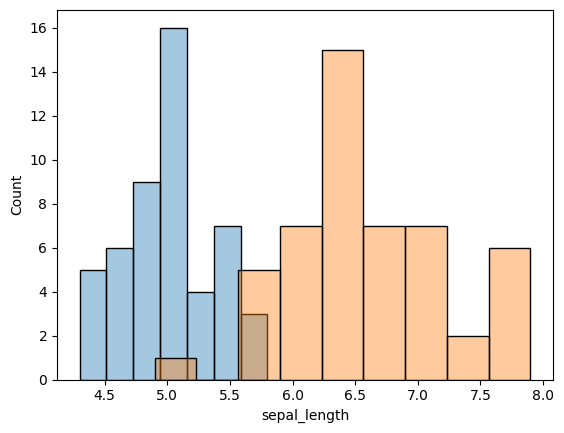

In [56]:
sns.histplot(
    a,
    alpha=0.4,
)
sns.histplot(
    b,
    alpha=0.4,
)
plt.show()

Another problem we face is that our histograms might have different numbers of samples, making one much bigger than the other. The result is two histograms that are very difficult to compare. To solve this, we can normalize our histograms using `density=True`. This command divides the height of each column by a constant such that the total shaded area of the histogram sums to 1.

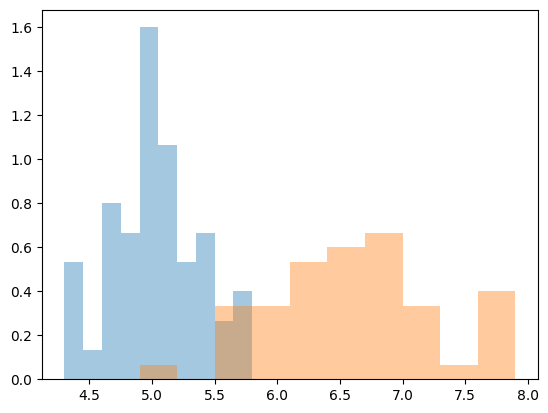

In [57]:
plt.hist(a, alpha=0.4, density=True)
plt.hist(b, alpha=0.4, density=True)
plt.show()